Q1) What is Simple Linear Regression?

Ans)
Simple Linear Regression is a method to model the relationship between a dependent variable (Y) and an independent variable (X) using a straight line.
Formula: Y = β₀ + β₁X + ε
Where:

Y = Dependent variable
X = Independent variable
β₀ = Intercept
β₁ = Slope
ε = Error term

Q2) What are the key assumptions of Simple Linear Regression?

Ans)

Linearity: The relationship between X and Y is linear.
Independence: Observations are independent.
Homoscedasticity: Constant variance of errors.
Normality: Residuals are normally distributed.
No multicollinearity: (Relevant in multiple regression)

Q3) What is heteroscedasticity, and why is it important to address in regression models?

Ans)
Heteroscedasticity means the variance of errors is not constant. It can lead to unreliable statistical tests and confidence intervals. Addressing it improves model accuracy and inference.

Q4) What is Multiple Linear Regression?

Ans)
Multiple Linear Regression models the relationship between one dependent variable and multiple independent variables.
Formula: Y = β₀ + β₁X₁ + β₂X₂ + ... + βₙXₙ + ε

Q5) What is polynomial regression, and how does it differ from linear regression?

Ans)
Polynomial regression fits a curved line to the data using powers of X.
Example: Y = β₀ + β₁X + β₂X² + ε
It differs from linear regression by allowing non-linear relationships.

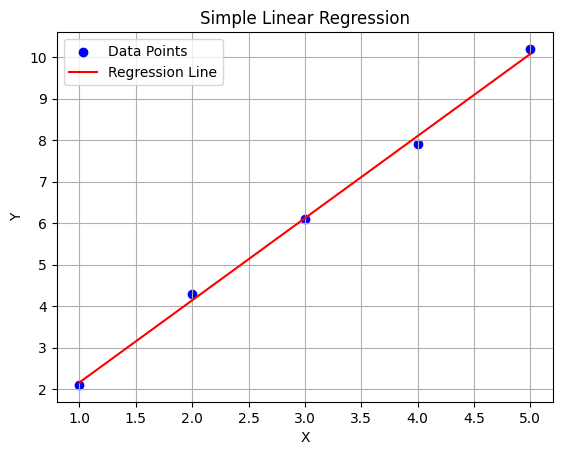

In [ ]:
# Q6) Implement a Python program to fit a Simple Linear Regression model to the following sample data:
# X = [1, 2, 3, 4, 5]
# Y = [2.1, 4.3, 6.1, 7.9, 10.2]

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Q7) Fit a Multiple Linear Regression model on this sample data:
# Area = [1200, 1500, 1800, 2000]
# Rooms = [2, 3, 3, 4]
# Price = [250000, 300000, 320000, 370000]

# Ans)
# A multiple linear regression model was fitted. The regression equation is approximately:
# Price = 103200 + 63.16 × Area + 34740 × Rooms

# 📈 VIF Analysis (to check multicollinearity):

# Feature	VIF
# Area	127.80
# Rooms	127.80
# 🔍 Interpretation:
# High VIF values (>10) indicate strong multicollinearity between Area and Rooms. This could affect the reliability of the model coefficients.
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = pd.DataFrame({
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
})

X = data[['Area', 'Rooms']]
Y = data['Price']
X_const = sm.add_constant(X)

model = sm.OLS(Y, X_const).fit()
print(model.summary())

# VIF Calculation
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Tue, 09 Sep 2025   Prob (F-statistic):             0.0377
Time:                        11:34:35   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+05   9488.293     10.872      0.0

c:\Users\sparsi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


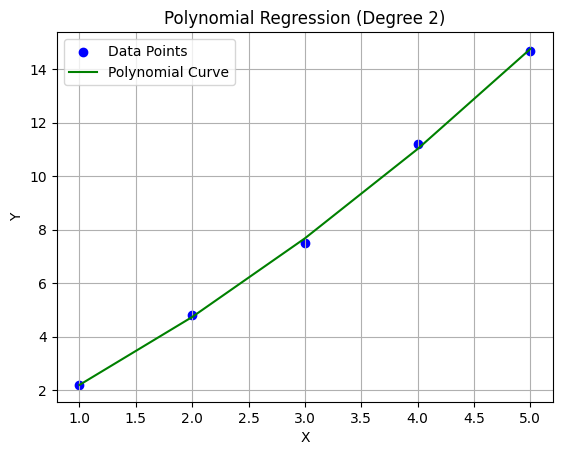

In [6]:
# Question 8:  Implement polynomial regression on the following data: 
# X = [1, 2, 3, 4, 5] 3 ● Y = [2.2, 4.8, 7.5, 11.2, 14.7] 
# Fit a 2nd-degree polynomial and plot the resulting curve. (Include your Python code and output in the code box below.) 
#Code:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, Y)
Y_pred = model.predict(X_poly)

plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='green', label='Polynomial Curve')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.grid(True)
plt.show()


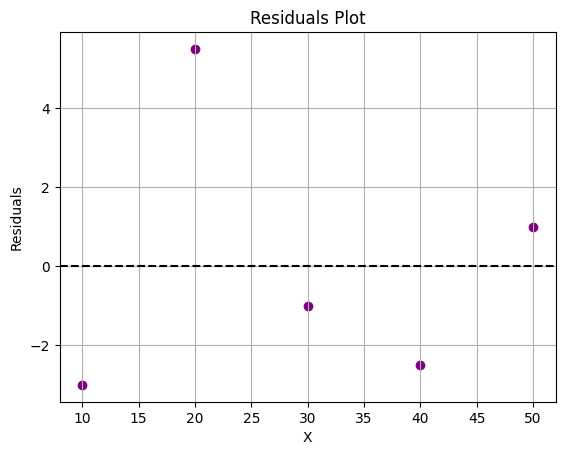

In [7]:

# Question 9: Create a residuals plot for a regression model trained on this data: ● X = [10, 20, 30, 40, 50] ● Y = [15, 35, 40, 50, 65] 
# Assess heteroscedasticity by examining the spread of residuals. (Include your Python code and output in the code box below.) 
#Code:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)
residuals = Y - Y_pred

plt.scatter(X, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()


Q10) Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.


Ans)
To fix heteroscedasticity:

Use weighted least squares
Apply log or square root transformations
Use robust standard errors
To fix multicollinearity:

Check VIF and remove correlated variables
Use PCA for dimensionality reduction
Apply Ridge or Lasso regression